Heart Disease Prediction Using Machine Learning
A Data Science project for CoderGirl using the Heart Disease UCI dataset: https://www.kaggle.com/ronitf/heart-disease-uci.

Background
In its entirety, the Cleveland database contains 76 attributes and classifies patients based on the absence or presence of heart disease. However, for this project, a subset of the following 14 attributes is being used:

Age (age in years)
Sex (0 = female; 1 = male)
CP (chest pain type)
TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
CHOL (serum cholesterol in mg/dl)
FPS (fasting blood sugar > 120 mg/dl) (0 = false; 1 = true)
RESTECH (resting electrocardiographic results)
THALACH (maximum heart rate achieved)
EXANG (exercise induced angina (0 = no; 1 = yes))
OLDPEAK (ST depression induced by exercise relative to rest)
SLOPE (the slope of the peak exercise ST segment)
CA (number of major vessels (0-3) colored by fluoroscopy)
THAL (3 = normal; 6 = fixed defect; 7 = reversible defect)
TARGET (0 = no disease; 1 = heart disease)
Project
This mini-project is divided into three phases:



# Exploratory data analysis


Import Libraries and Load the Data



In [116]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [117]:
#loading the data
hd = pd.read_csv('heart.csv')

Get to Know the Data



In [118]:
#sample data
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


View Statistics



In [119]:
#finding the statistics of data
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Examine Potentially Erroneous Values

First feature : Thal

I noticed that the Thal feature only had 3 described datatypes: fixed defect, normal, and reversible defect.



However, in the statistics data above ,if you see min value of thal feature, I could see value of 0. I could not find any information on the meaning of this category.


Let's look more closely at the data in those rows.


In [120]:
hd.loc[hd.loc[:,'thal']==0]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


Since its categorical value I wont be able to take mean/median and replace the value with that. I will find out mode of people with heart disease and without heart disease and replace that values with this.

In [121]:
HD_yes=hd.loc[hd.loc[:,'target']==1]
HD_no=hd.loc[hd.loc[:,'target']==0]
print("Most common Thalium Stress Test result in those dianosed with Heart Disease:", HD_yes.thal.mode())
print("Most common Thalium Stress Test result in those dianosed without Heart Disease:", HD_no.thal.mode())


Most common Thalium Stress Test result in those dianosed with Heart Disease: 0    2
dtype: int64
Most common Thalium Stress Test result in those dianosed without Heart Disease: 0    3
dtype: int64


In [122]:
#now replacing these values to that row.
hd.loc[48, 'thal']=2.0
hd.loc[281, 'thal']=3.0


Next feature :ca

I noticed that the CA feature only had 0-3 VALUES

However, in the statistics data above ,if you see max value of ca feature, I could see value of 4. I could not find any information on the meaning of this category.

Let's look more closely at the data in those rows.


In [123]:
hd.loc[hd.loc[:,'ca']==4]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2.0,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3.0,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2.0,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3.0,0


Since its categorical value I wont be able to take mean/median and replace the value with that. I will find out mode of people with heart disease and without heart disease and replace that values with this.

In [124]:
PHD=hd.loc[hd.loc[:,'target']==1]
AHD=hd.loc[hd.loc[:,'target']==0]
print("Most common Ca Test result in those dianosed with Heart Disease:", PHD.ca.mode())
print("Most common ca Test result in those dianosed without Heart Disease:", AHD.ca.mode())


Most common Ca Test result in those dianosed with Heart Disease: 0    0
dtype: int64
Most common ca Test result in those dianosed without Heart Disease: 0    0
dtype: int64


In [125]:
#now replacing these values to that row.
hd.loc[92, 'ca']=0
hd.loc[158, 'ca']=0
hd.loc[163, 'ca']=0
hd.loc[251, 'ca']=0


Finding other statistics of the dataset

In [126]:
#finding the number of rows and columns
hd.shape

(303, 14)

In [127]:
#Finding the count of people with disesase as per age
hd.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [128]:
#finding the data types of columns
hd.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal        float64
target        int64
dtype: object

# Check for Duplicates



In [129]:
# check for duplicate observations
hd[hd.duplicated(keep=False)]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [130]:
# drop duplicate observation
hd = hd.drop_duplicates()


In [131]:
# verify duplicate was removed
hd[hd.duplicated() == True]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


# Missing Values

In [132]:
#finding missing values
hd.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Outliers

Finding outliers

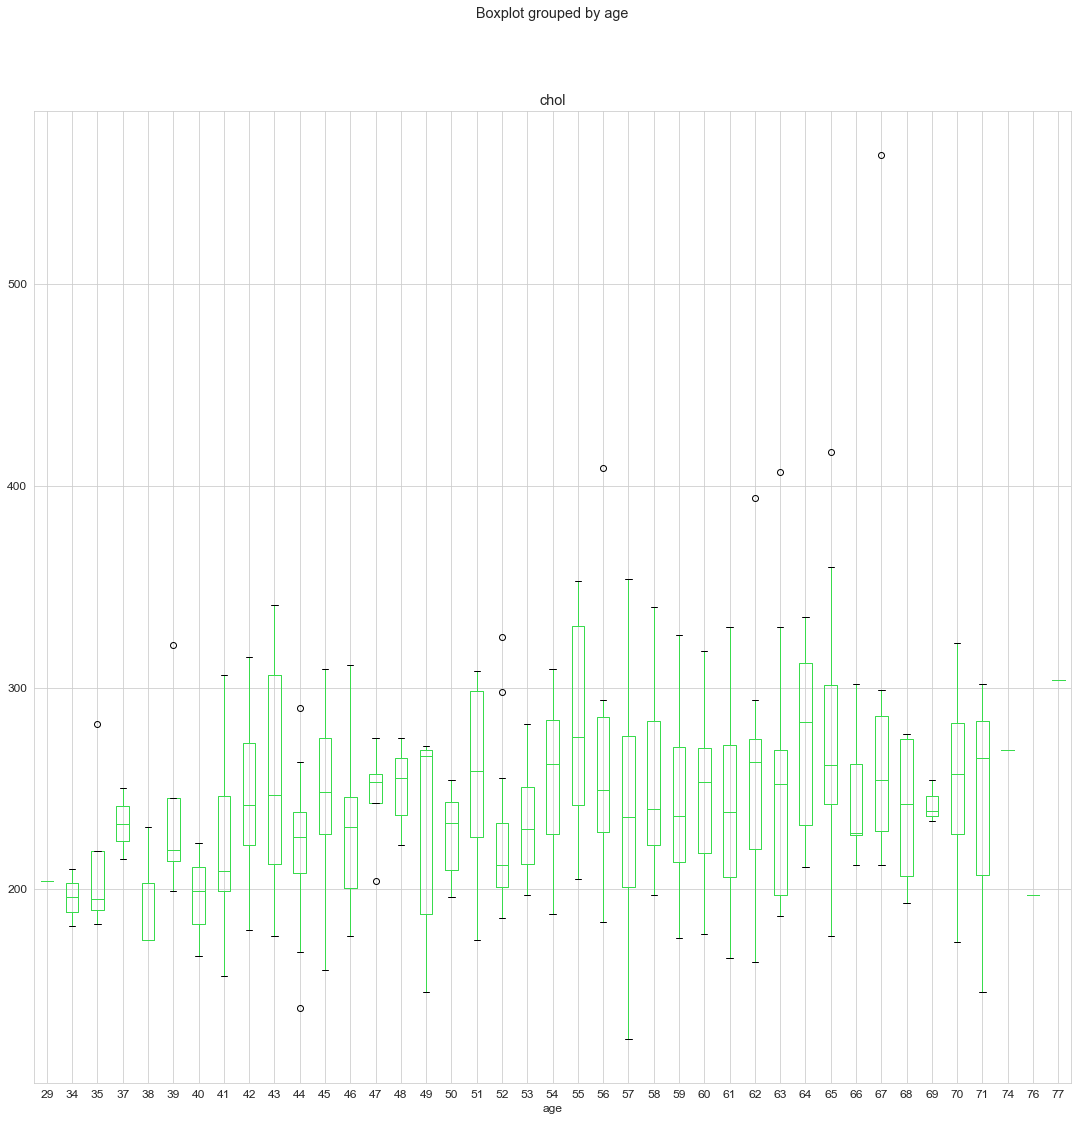

In [133]:
#checking for outliers . First lets check Cholesterol

#boxplot between age and chol
hd.boxplot(column='chol',by='age', figsize=(18,18))
plt.show()



In [134]:
#Lets find out the value of mean and standard deviation of cholesterol column in order to be sure of the outliers. Anything above 3 std is considered as outliers

mean_chol = hd['chol'].mean()
std_chol = hd['chol'].std()
thershold_value = 3*std_chol
lower, upper=mean_chol - thershold_value, mean_chol + thershold_value

mean_chol,std_chol,thershold_value,lower,upper



(246.26402640264027,
 51.830750987930045,
 155.49225296379012,
 90.77177343885015,
 401.75627936643036)

In [135]:
#As per the above box plot I could see there are 4 cholesterol points which are above 400 . lets now examine the other features for this cholesterol outliers. Now as per above we have set the upper and lower bounderies for cholesterol
#finding the ones which is above the upper limit
highchol = hd[hd.chol>400]
highchol



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2.0,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3.0,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3.0,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3.0,0


In [136]:
#Now lets examine the data above and determine whether to remove or not. out of these 4 there are 2 data points which has target as 0
#that means they dont have heart disease. this is not creating any impact on the target so I am keeping these. For the index 28 & 85 rest all features looks good not removing this as well.
# For these 4 data points will replace their value with their mean values as other feature data looks informative and reasonable values

hd4 = hd[hd.chol < 400]
hd4p=hd4.loc[hd4.loc[:,'target']==1]
hd4a=hd4.loc[hd4.loc[:,'target']==0]

print("Mean serum cholesterol in those with heart disease is:", hd4p.chol.mean())
print("Mean serum cholesterol in those without heart disease is:", hd4a.chol.mean())

hd['chol']=hd['chol'].replace([417,564], 240)
hd['chol']=hd['chol'].replace([407, 409], 249)

# Lets verify if the outliers are replaced

highchol = hd[hd.chol>400]
highchol






Mean serum cholesterol in those with heart disease is: 239.1840490797546
Mean serum cholesterol in those without heart disease is: 248.77941176470588


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [137]:
# finding the ones which is below the lower limit

lowchol = hd[hd.chol<91]
lowchol

# There is no outliers on the lower limit

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Next will go with Trestbps

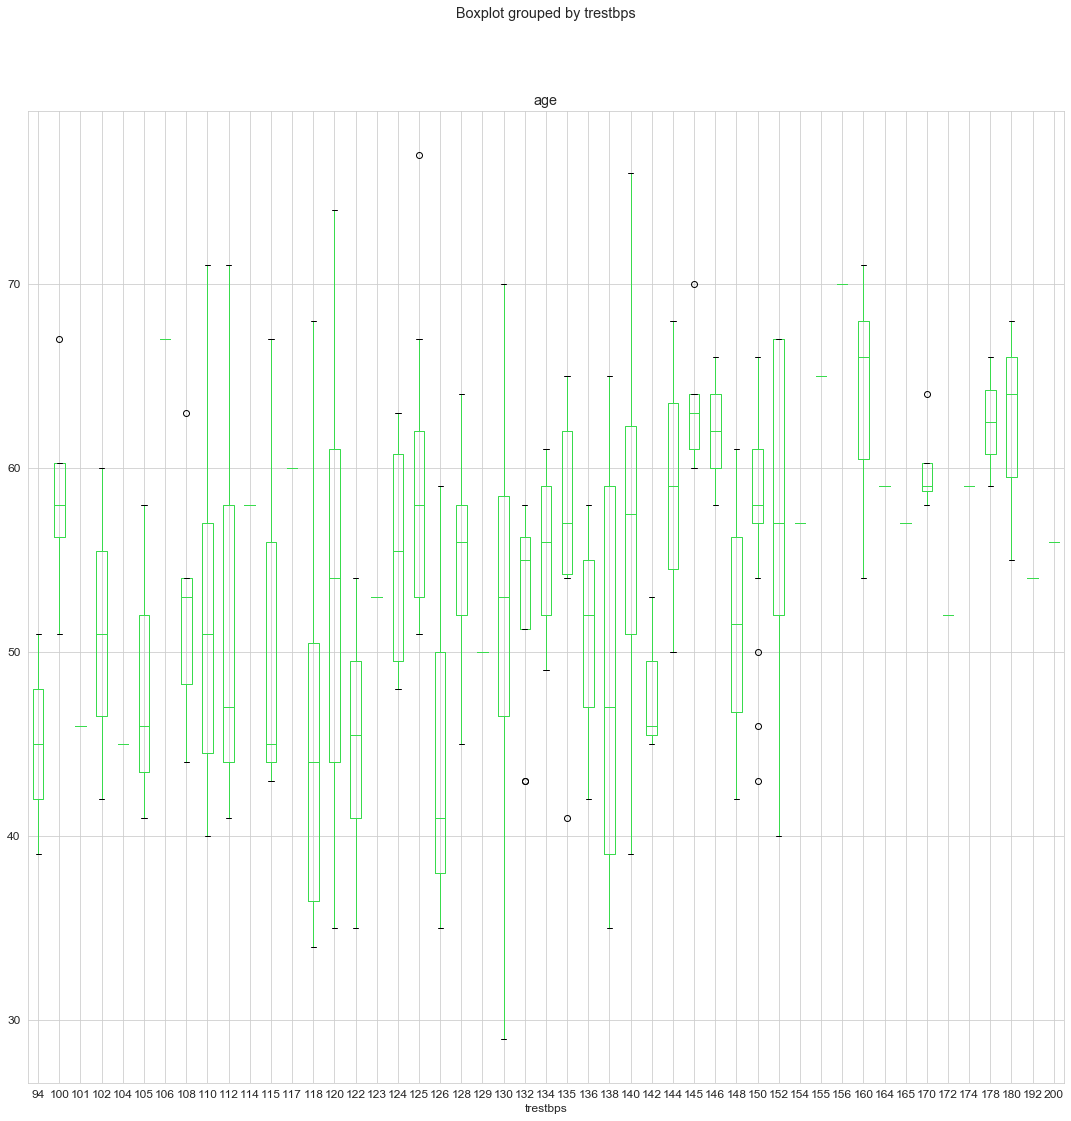

In [138]:
hd.boxplot(column='age',by='trestbps',figsize=(18,18))
plt.show()


In [139]:
#Lets find out the value of mean and standard deviation of trestbps column in order to be sure of the outliers. Anything above 3 std is considered as outliers

mean_trestbps = hd['trestbps'].mean()
std_trestbps = hd['trestbps'].std()
thershold_value = 3*std_trestbps
lower, upper=mean_trestbps - thershold_value, mean_trestbps + thershold_value

mean_trestbps,std_trestbps,thershold_value,lower,upper



(131.62376237623764,
 17.53814281351709,
 52.61442844055127,
 79.00933393568636,
 184.23819081678892)

In [140]:
#As per the above box plot I could see there are 2 trestbps points which are above 184 . lets now examine the other features for this cholesterol outliers. Now as per above we have set the upper and lower bounderies for trestbps
#finding the ones which is above the upper limit
hightrestbps = hd[hd.trestbps>184]
hightrestbps

#Looking at the data ,people with high bp is not having heart disease. Other features values also looks reasonable. trestbps values are not too high from the upper limit.I am planning to keep the data as it is.



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3.0,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3.0,0


In [141]:
#finding the ones which is above the lower limit
lowtrestbps = hd[hd.trestbps<79]
lowtrestbps

# There is no outliers on the lower limit


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Next will go with thalach

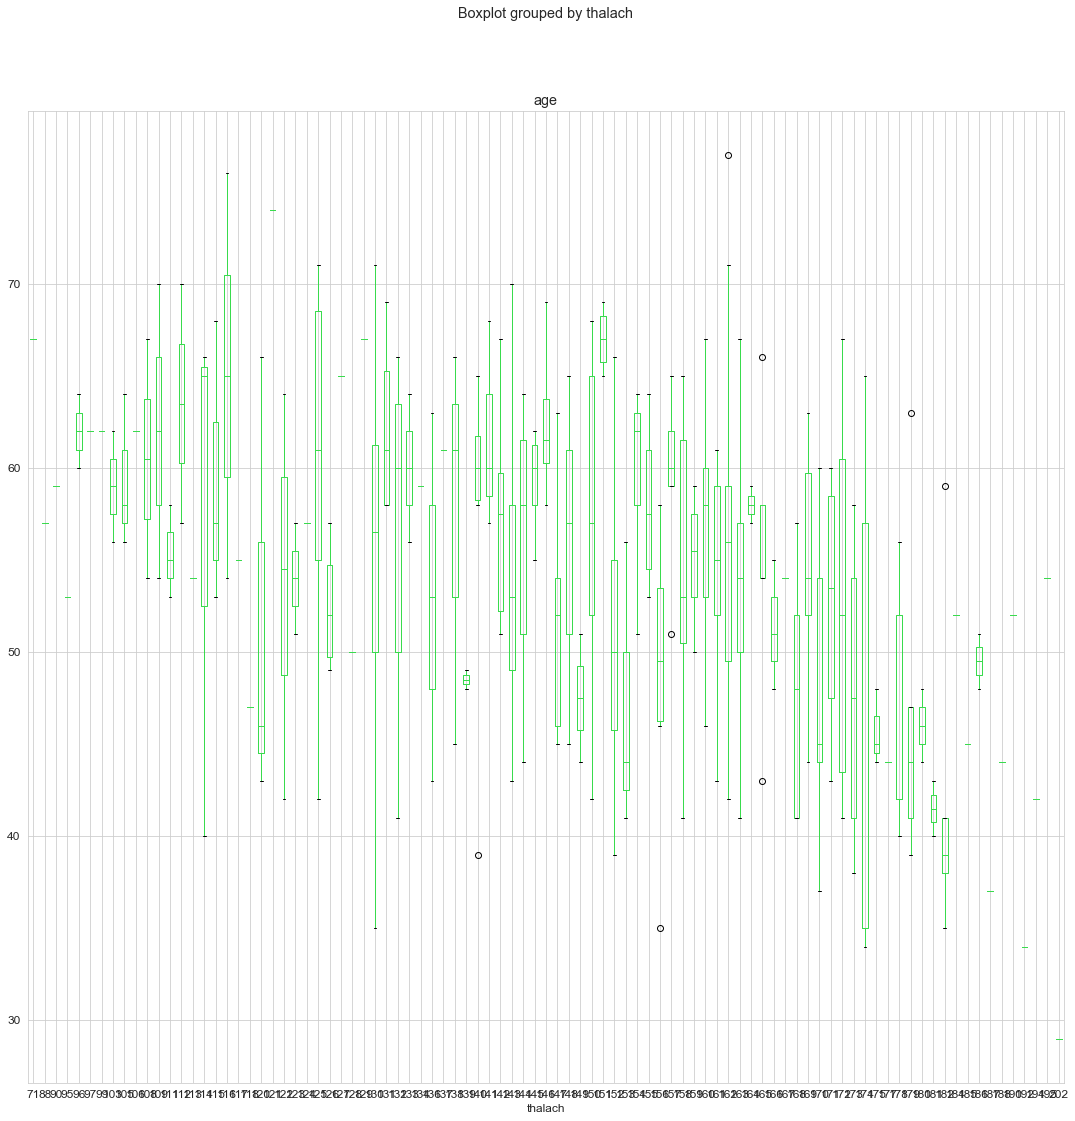

In [142]:
hd.boxplot(column='age',by='thalach',figsize=(18,18))
plt.show()


In [143]:
#Lets find out the value of mean and standard deviation of thalach column in order to be sure of the outliers. Anything above 3 std is considered as outliers

mean_thalach = hd['thalach'].mean()
std_thalach = hd['thalach'].std()
thershold_value = 3*std_thalach
lower, upper=mean_thalach - thershold_value, mean_thalach + thershold_value

mean_thalach,std_thalach,thershold_value,lower,upper


(149.64686468646866,
 22.905161114914087,
 68.71548334474227,
 80.9313813417264,
 218.36234803121093)

In [144]:

#finding the ones which is above the upper limit
highthalach = hd[hd.thalach>218]
highthalach

# There is no outliers on the upper limit


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [145]:
#finding the ones which is above the lower limit
lowthalach = hd[hd.thalach<81]
lowthalach

#there is one outlier on the lower limit. thats way too low from the mean but still other features looks reasonable. I am going to keep it as it is

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2.0,0


Now lets find the mean and SD for the overall dataframe to decide which other features I need to analyze for the outliers

In [146]:
    mean = hd.mean()
    SD = hd.std()
mean,SD

# according to the below table, it doesn't make any sense to look for outliers on the age column as age is a fact and value we cannot change/remove.
# sex is a binary value and we cannot change the value of it
#CP is a binary value and we cannot find outliers for these values
#fbs is a binary value and we cannot find outliers for these values
#restecg is a binary value and we cannot find outliers for these values
#exang is a binary value and we cannot find outliers for these values
#oldpeak is a binary value and we cannot find outliers for these values
#slope is a binary value and we cannot find outliers for these values
#ca is a binary value and we cannot find outliers for these values
#thal is a binary value and we cannot find outliers for these values



(age          54.366337
 sex           0.683168
 cp            0.966997
 trestbps    131.623762
 chol        243.561056
 fbs           0.148515
 restecg       0.528053
 thalach     149.646865
 exang         0.326733
 oldpeak       1.039604
 slope         1.399340
 ca            0.676568
 thal          2.330033
 target        0.544554
 dtype: float64, age          9.082101
 sex          0.466011
 cp           1.032052
 trestbps    17.538143
 chol        45.555970
 fbs          0.356198
 restecg      0.525860
 thalach     22.905161
 exang        0.469794
 oldpeak      1.161075
 slope        0.616226
 ca           0.953043
 thal         0.583994
 target       0.498835
 dtype: float64)

In [147]:
# finding the correlation matrix
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.182278,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.336993,0.065157,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.137902,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.089099,0.215154,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.102289,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.209512,-0.174156,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.142709,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.103635,0.059365,-0.144931
chol,0.182278,-0.137902,-0.102289,0.142709,1.000000,0.003827,-0.112066,-0.028446,0.092901,0.014772,0.013106,0.090909,0.048278,-0.104995
fbs,0.121308,0.045032,0.094444,0.177531,0.003827,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.132212,0.002364,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.112066,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.100764,-0.008683,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.028446,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.247190,-0.113545,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.092901,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.133267,0.233257,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.014772,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.282726,0.209692,-0.430696


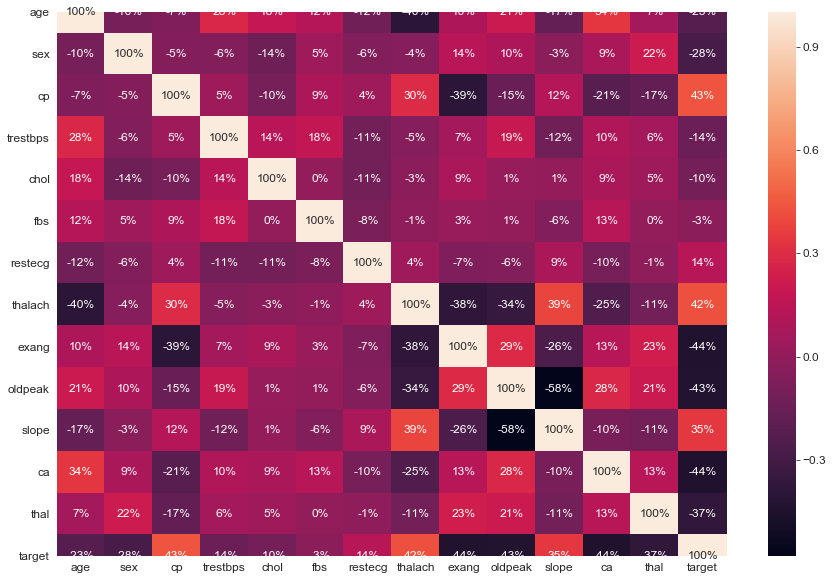

In [148]:
#visualize the correlation
plt.figure(figsize=(15,10))
sns.heatmap(hd.iloc[:,0:15].corr(), annot=True,fmt=".0%")
plt.show()


In [149]:
#finding the count of people having heart disease and without heart disease
hd.target.value_counts()


1    165
0    138
Name: target, dtype: int64

# Visualisation of data with different features along with target

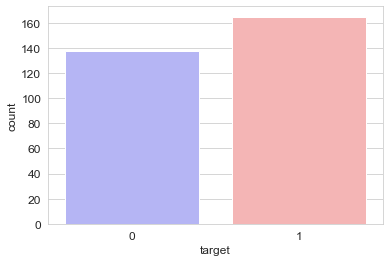

In [150]:
#plotting the graph as per target
sns.countplot(x="target", data=hd, palette="bwr")
plt.show()


In [151]:
countNoDisease = len(hd[hd.target == 0])
countHaveDisease = len(hd[hd.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(hd.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(hd.target))*100)))


Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


Text(0.5, 1.0, 'Frequency')

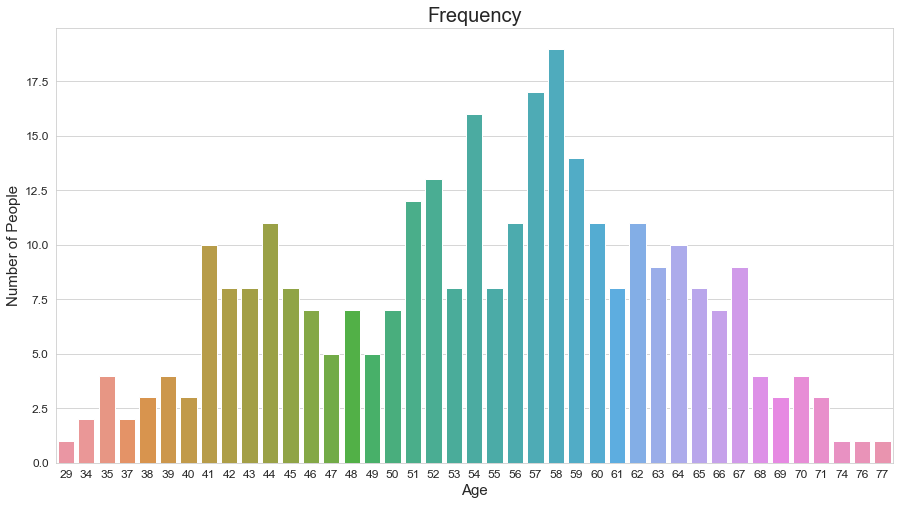

In [152]:
#no of people having heart disease based on age
plt.figure(figsize = (15,8))
sns.countplot(hd['age'])
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)


Text(0.5, 1.0, 'Histogram')

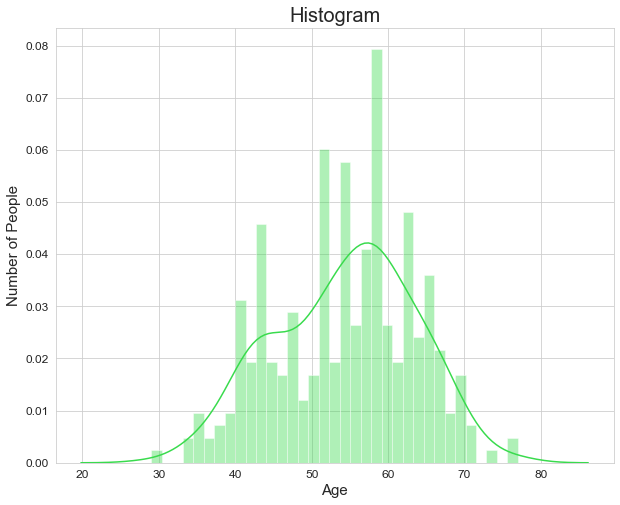

In [153]:
#Plotting the Distribution of Age. 
#Histogram
plt.figure(figsize = (10,8))
sns.distplot(hd['age'], bins = 35, kde = True)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Histogram', fontsize = 20)


Text(0.5, 1.0, 'Frequency')

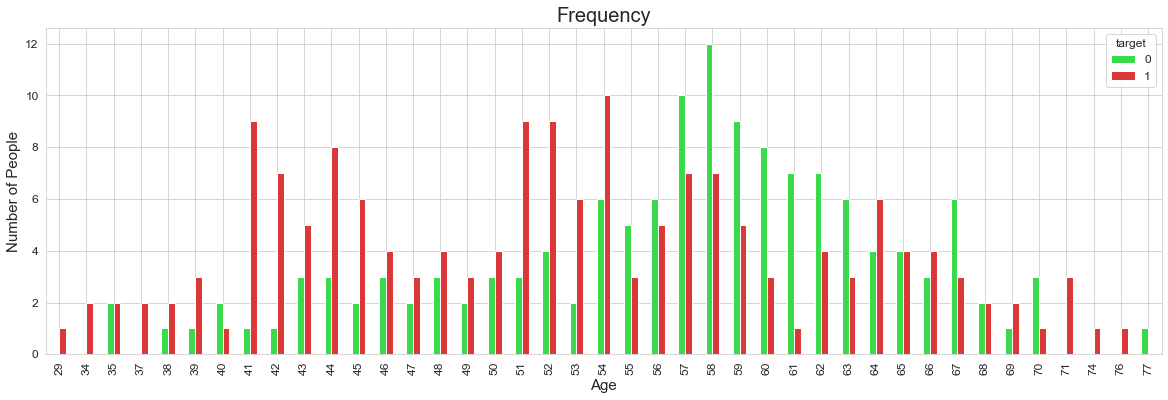

In [154]:
#lets crosstabs for age and target.
pd.crosstab(hd.age,hd.target).plot(kind='bar',figsize=(20,6))
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Number of People', fontsize = 15)
plt.title('Frequency', fontsize = 20)


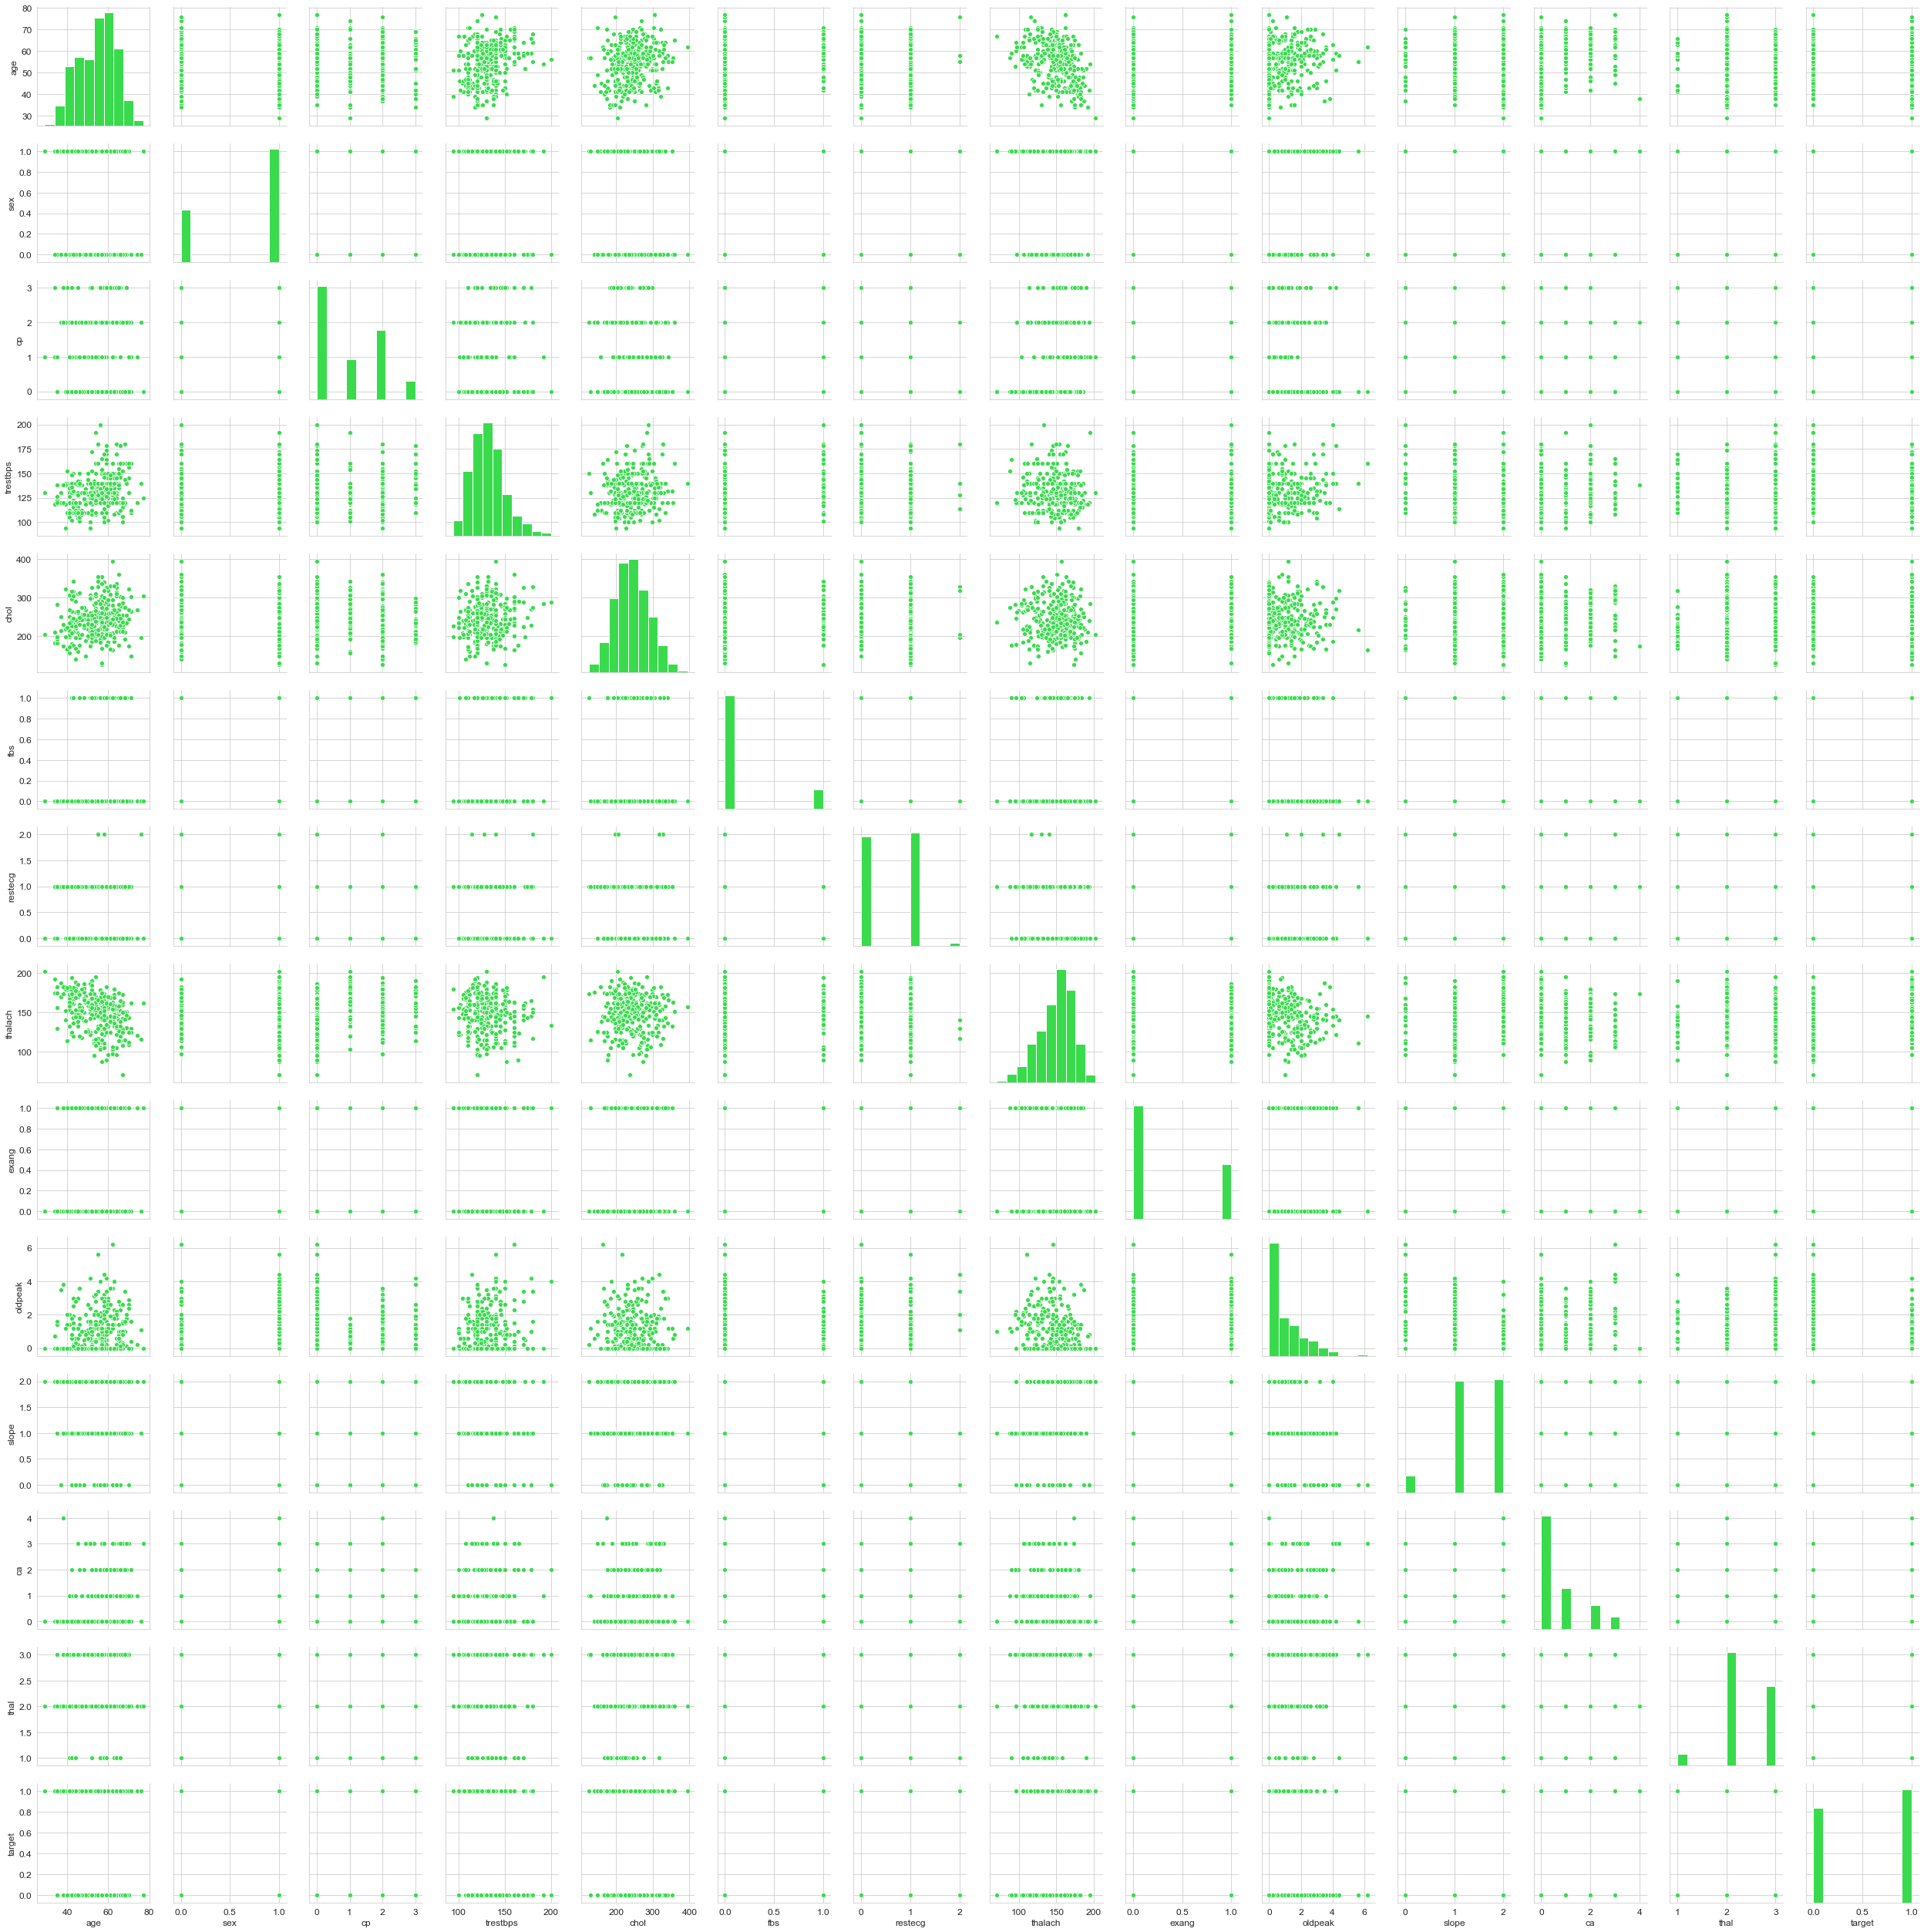

In [155]:
#finding correlation with all features
sns.pairplot(hd);


In [156]:
# correlation found between age & testbps , age & chol, chol & testbps, testbps & thalach, thalach & chol,thalach & age, age & old peak, old peak & testbps, old peak & chol,

# Creating age group to identify the heartdisease based on a group

In [157]:
#creating age bins for certain age group
hd['age']=hd['age']
bins=[29,47,55,61,77]
labels=["Young Adult","Early Adult","Adult","Senior"]
hd['age_group']=pd.cut(hd['age'],bins,labels=labels)
hd.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1,Senior
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1,Young Adult
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1,Young Adult
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1,Adult
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1,Adult


# Plotting graph between certain features and target

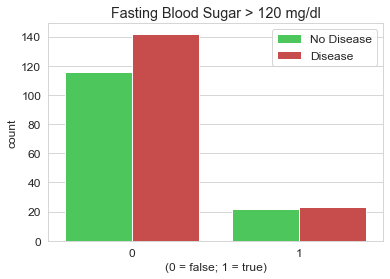

In [158]:
# plot fbs (fasting blood sugar) 
target_colors = ["#39db4d", "#db3939"]

sns.set_palette(target_colors)
sns.countplot(hd.fbs, hue=hd.target)
plt.title("Fasting Blood Sugar > 120 mg/dl")
plt.xlabel("(0 = false; 1 = true)")
plt.legend(["No Disease", "Disease"])
plt.show()


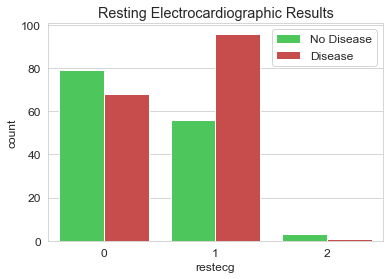

In [159]:
# plot restecg (resting electrocardiographic results) 
sns.set_palette(target_colors)
sns.countplot(hd.restecg, hue=hd.target)
plt.title("Resting Electrocardiographic Results")
plt.legend(["No Disease", "Disease"])
plt.show()


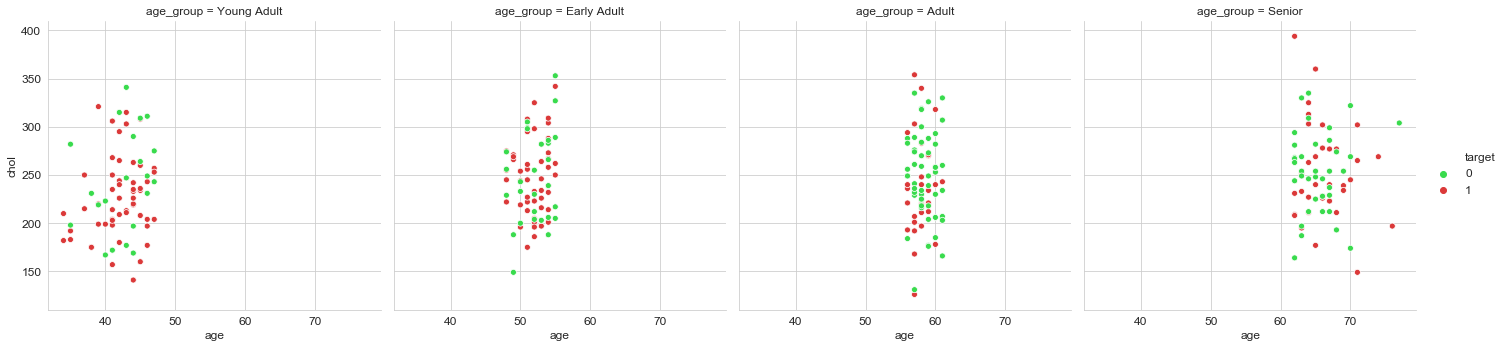

In [160]:
#plotting graph between age and chol
sns.relplot(x="age", y="chol", hue="target",
            col="age_group", data=hd);


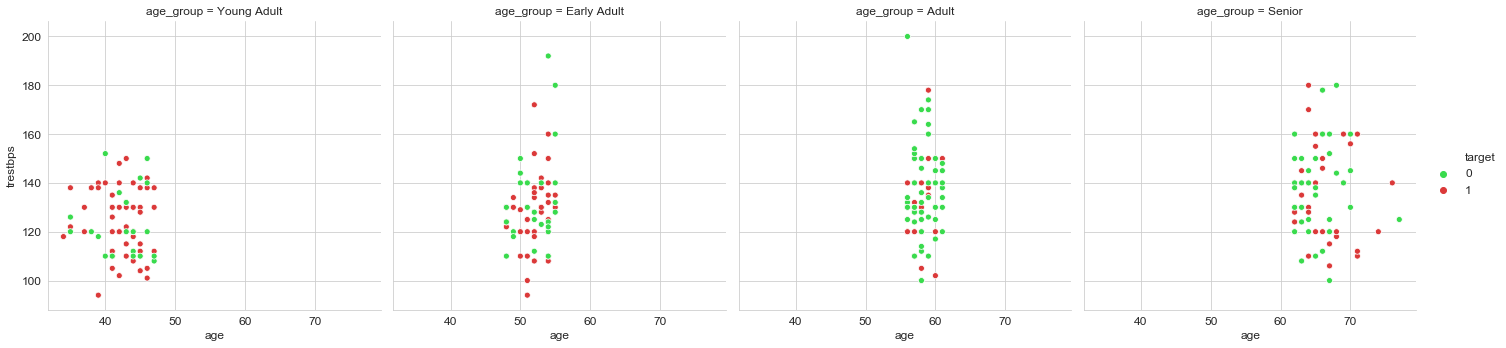

In [161]:
#plotting graph between age and trestbps

sns.relplot(x="age", y="trestbps", hue="target",
            col="age_group", data=hd);


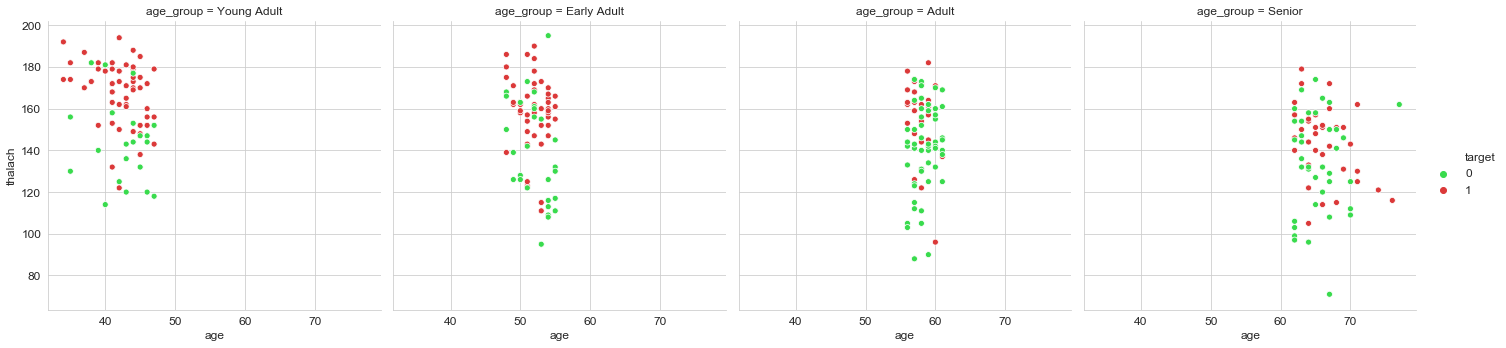

In [162]:
#plotting graph between age and thalach

sns.relplot(x="age", y="thalach", hue="target",
            col="age_group", data=hd);


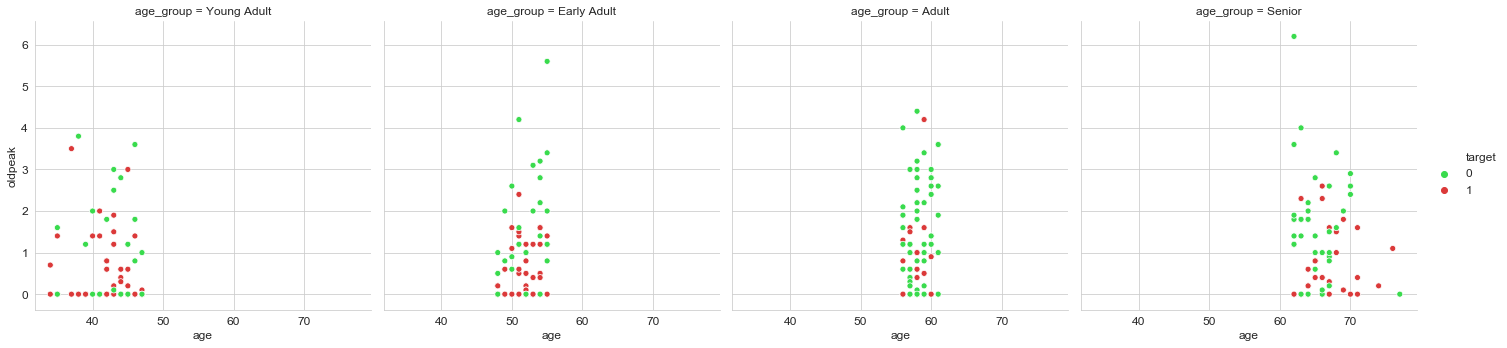

In [163]:
#plotting graph between age and oldpeak

sns.relplot(x="age", y="oldpeak", hue="target",
            col="age_group", data=hd);


Text(0.5, 1.0, 'Percentage of people as per chest pain type')

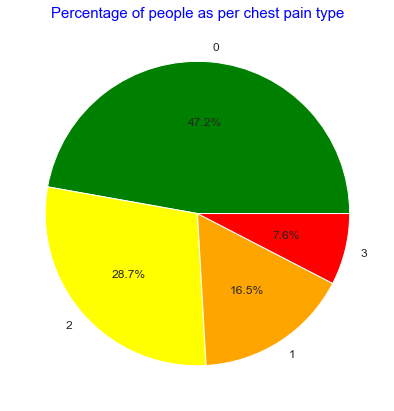

In [164]:
#plotting pie graph based on chest pain type
hd.cp.dropna(inplace = True)
labels = hd.cp.value_counts().index
colors = ['green','yellow','orange','red']
explode = [0,0,0,0]
sizes = hd.cp.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of people as per chest pain type',color = 'blue',fontsize = 15)

# Filtering

In [165]:
#filtering
Earlyadult_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Early Adult") & (hd.cp>1)]
Earlyadult_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2.0,1,Early Adult
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2.0,1,Early Adult
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3.0,1,Early Adult


In [166]:
adult_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Adult") & (hd.cp>1)]
adult_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2.0,1,Adult
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3.0,1,Adult
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3.0,0,Adult
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2.0,0,Adult


In [167]:
senior_chol=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.age_group=="Senior") & (hd.cp>1)]
senior_chol

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2.0,1,Senior
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2.0,1,Senior
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2.0,1,Senior
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3.0,1,Senior
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2.0,1,Senior
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2.0,1,Senior
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2.0,0,Senior
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3.0,0,Senior
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2.0,0,Senior
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3.0,0,Senior


In [168]:
overallpeople=hd[(hd.chol>246) & (hd.trestbps>131) & ((hd.sex==0)|(hd.sex==1)) & (hd.cp>1)]
overallpeople

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2.0,1,Adult
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2.0,1,Early Adult
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2.0,1,Senior
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2.0,1,Senior
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2.0,1,Early Adult
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2.0,1,Young Adult
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2.0,1,Young Adult
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2.0,1,Senior
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3.0,1,Early Adult
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3.0,1,Adult


In [169]:
hd = hd.drop('age_group',axis =1)
hd.head(5)
hd.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [170]:
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3.0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3.0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3.0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3.0,0


# Feature Engineering

Finding feature importance
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable. Lets find out which feature has the higher score by running the feature importance using random forest

In [171]:
#using random forest finding feature importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hd.drop('target', 1), hd['target'], test_size = .2, random_state=10) #split the data


In [172]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)


C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 2 (0.207791)
2. feature 11 (0.181251)
3. feature 9 (0.097005)
4. feature 7 (0.094779)
5. feature 3 (0.077931)
6. feature 0 (0.070950)
7. feature 4 (0.069835)
8. feature 12 (0.053049)
9. feature 10 (0.049402)
10. feature 1 (0.032244)
11. feature 8 (0.027852)
12. feature 6 (0.019314)
13. feature 5 (0.018597)


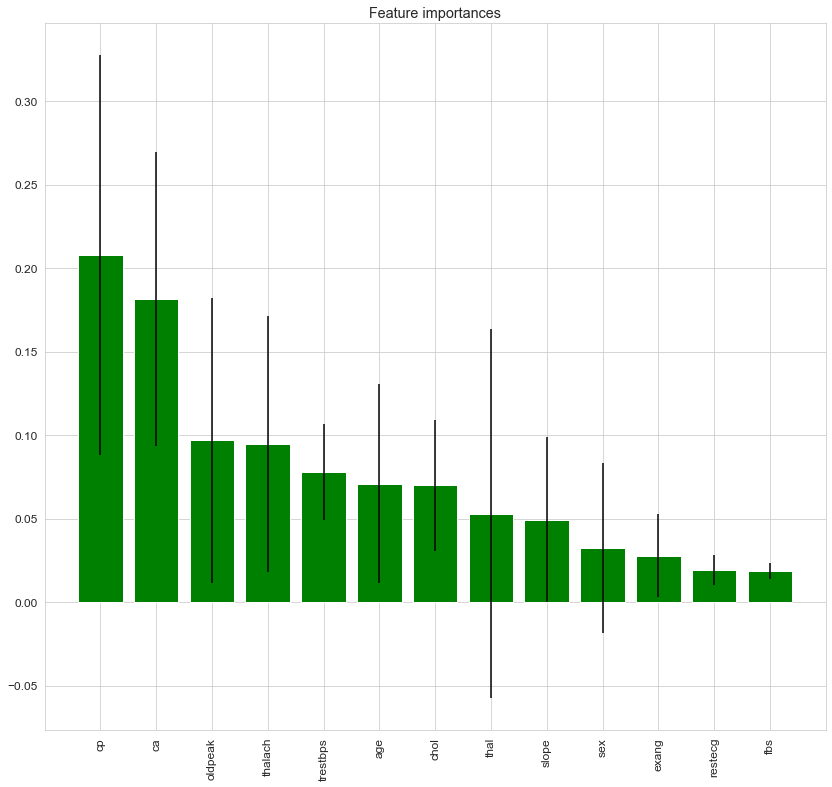

In [173]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


Conclusion : After doing analysis on the data there are my observations from overall dataset
1. Lets start with target feature where 0 means "no heart disease" and 1 means " have heart disease". This dataset is fair because percentage of people having heart disease is 54% and ones not having heart disease is 47%. Not much difference its equally biased results
2. Age : I could see age group ranges from young people to senior people.
3. Looks like young adult(age 29 to 47) and early adult( age 47 to 55)are more prone to heart disease according to this dataset. These age group has high cholesterol ,trestbps,thalach and oldpeaklevels which is causing this heart disease.
4. Accoring to data, 7.6% people are having cp type 3, 47% are having cp type 0,16.6% cp type 1, 28% cp type 2. this data is good as less percentage of people in cp type 2 and 3.
5. Correlation matrix shows there is a correlation between cholesterol,trestbps,thalach and old peak. 
6. Its pretty clean dataset with no missing values and sample size looks small.
7. Its more of binary classification problem .
8. According to feature importance top 5 features looks like(CP,ca,old peak,thalach,trestbps).


Export this clean data set into csv file to create a model

In [174]:
#HeartDisease = hd.to_csv (r'C:\Users\sange\HeartDisease_clean.csv', index = None, header=True) 

# Part 2 : Modelling

I am planning to create 3 models to predict this binary classification problem. I am taking one model at a time to train the model, predict the outcome and the evaluate the model using some metrics like(accuracy,precision,cm,recall,F1 score and ROC curve). I have choosen 3 models Logistic regression,random forest and KNN neighbors. All these ML algorithms are supervised learning based model and its used for binary classification model.

First lets start with Logistic regression 

# Logistic Regression 

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

our problem statement is predicting heart disease based on the other health factors like(cholesterol,resting BP,fasting blood sugar etc). Its more of binary classification problem. I need to create a model which will help in predicting the outcome of binary classification problem. Hence I go for logistic regression model

Training the model - Logistic Regression model


Step 1: lets first split the data into training and testing data. Then I will use the training data to train the model and test it against the model built.


In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hd.drop('target', 1), hd['target'], test_size = .2, random_state=0) #split the data


In [176]:
from sklearn.linear_model import LogisticRegression


Step 2. Make an instance of the Model


In [177]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

# Empty dict to collect the accuracy of each model
accuracies = {}



Step 3. Training the model on the data, storing the information learned from the data
Model is learning the relationship between features (x_train) and target (y_train)


In [178]:
logisticRegr.fit(X_train, y_train)


C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Step 4. Predict labels for new data (new patients)
Uses the information the model learned during the model training process


In [179]:
# Predictions for all the data
predictions = logisticRegr.predict(X_test)


# Measuring Model Performance (Heartdisease Dataset)


Accuracy - first metric


In [180]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test,y_test) *100

# adding logistic regression accuracy to that empty dictionary
accuracies['Logistic Regression'] = score

print("Test Accuracy {:.2f}%".format(score))



Test Accuracy 86.89%


Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

    Accuracy = number of correct predictions/Total number of predictions

Accuracy shows 86.89% for this model. This is a good score to start with predicting heartdisease for the new patients. Lets check the other metrics for this model

Confusion Matrix (Heartdisease Dataset)
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. Lets examine confusion matrix through two python packages (Seaborn and Matplotlib).

First one : Matplotlib


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[22  5]
 [ 3 31]]


As you can see , there is 2*2 matrix which shows positives and negatives. Total sample size is 302 and 14 features. out of 14 features , 13 are features and 1 is the predicted outcome(target). out of which 80% data is choosen as training data and 20% is choosen as testing data. 22 is predicted as true postive and 31 is predicted correctly as true negative. 5 is predicted wrongly true negative and 3 as false positive. same is represented using seaborn in visual way.

As you can see below, this method produces a more understandable and visually readable confusion matrix using seaborn.


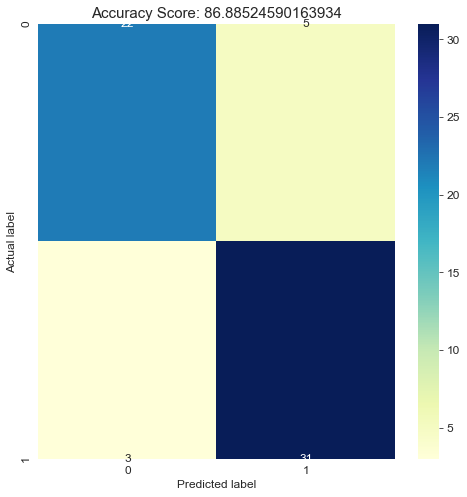

In [182]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='g',cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive). Sensitivity is also termed as Recall. This implies that there will be another proportion of actual positive cases, which would get predicted incorrectly as negative (and, thus, could also be termed as the false negative). This can also be represented in the form of a false negative rate. The sum of sensitivity and false negative rate would be 1. Let's try and understand this with the model used for predicting whether a person is suffering from the disease. Sensitivity is a measure of the proportion of people suffering from the disease who got predicted correctly as the ones suffering from the disease. In other words, the person who is unhealthy actually got predicted as unhealthy.

Sensitivity = (True Positive)/(True Positive + False Negative)


Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative). This implies that there will be another proportion of actual negative, which got predicted as positive and could be termed as false positives. This proportion could also be called a false positive rate. The sum of specificity and false positive rate would always be 1. Let's try and understand this with the model used for predicting whether a person is suffering from the disease. Specificity is a measure of the proportion of people not suffering from the disease who got predicted correctly as the ones who are not suffering from the disease. In other words, the person who is healthy actually got predicted as healthy is specificity.

Specificity = (True Negative)/(True Negative + False Positive)



In [183]:
total=sum(sum(cm))

specificity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Specificity : ', specificity)

sensitivity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Sensitivity : ', sensitivity )


Specificity :  0.88
Sensitivity :  0.8611111111111112


As per the results above, specificity is showing 88% which says its very good at predicting person who is healthy actually got predicted as healthy

Sensitivity is showing 86% which says its very good at predicting person who is unhealthy actually got predicted as unhealthy.

Precision
Precision attempts to answer the following question:

What proportion of positive identifications was actually correct?

Precision is defined as follows:

Precision = TP/TP+FP

Recall
Recall attempts to answer the following question:

What proportion of actual positives was identified correctly?

Mathematically, recall is defined as follows:
    
    Recall = TP/TP+FN

Precision, recall and F score



In [184]:
from sklearn.metrics import precision_recall_fscore_support
#'macro':
#Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.


precision_recall_fscore_support(y_test, predictions,average='macro')


#micro':
#Calculate metrics globally by counting the total true positives, false negatives and false positives.

precision_recall_fscore_support(y_test, predictions,average='micro')


#weighted':
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

precision_recall_fscore_support(y_test, predictions,average='weighted')




(0.869471766848816, 0.8688524590163934, 0.8682039272203208, None)

As per the results above, Precision and recall are close to 86%. Its predicting the results correctly.

F1Score

In [185]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average='macro')





f1_score(y_test, predictions, average='micro')


f1_score(y_test, predictions, average='weighted')


f1_score(y_test, predictions, average=None)




array([0.84615385, 0.88571429])

ROC curve

ROC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
    TPR = TP/TP+FN

False Positive Rate (FPR) is defined as follows:
    FPR = FP/FP+TN

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.



Area under the curve: 0.9052287581699348


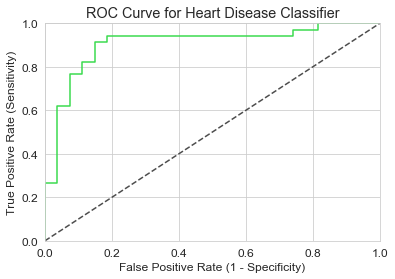

In [186]:
from sklearn import metrics
y_pred_logisreg = logisticRegr.predict_proba(X_test)[:, 1]

fprLR, tprLR, thresholdsLR = metrics.roc_curve(y_test, y_pred_logisreg)

fig, ax = plt.subplots()
ax.plot(fprLR, tprLR)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


aucLR=metrics.auc(fprLR, tprLR)
print("Area under the curve:", aucLR)


Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent
0.80 - 0.90 = good
0.70 - 0.80 = fair
0.60 - 0.70 = poor
0.50 - 0.60 = fail

AUC for our model is 0.90 which is excellent according to the sources. 



# #Random forest model

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction


our problem statement is predicting heart disease based on the other health factors like(cholesterol,resting BP,fasting blood sugar etc). Its more of binary classification problem. First I created logistic regression model to get the predicted outcome. Now I want to compare my results with one more supervised learning model thats why choosing Random forest. With its decision tree it will take all my features and will take yes or no decision more of 0 or 1 outcome for each feature which will eventually gives us only one output 0 or 1.


Lets use the same training and testing set as logistic regression model.


In [187]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train);


Make Predictions on the Test Set
Our model has now been trained to learn the relationships between the features and the targets. The next step is figuring out how good the model is! To do this we make predictions on the test features (the model is never allowed to see the test answers). We then compare the predictions to the known answers. When performing regression, we need to make sure to use the absolute error because we expect some of our answers to be low and some to be high. did when establishing the baseline).




In [188]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test )
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 0.24 degrees.


Determine Performance Metrics


Accuracy and confusion matrix

In [189]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test))*100
# adding random forest accuracy to that empty dictionary
accuracies['Random Forest'] = ac_2

print('Accuracy is: ',ac_2)



Accuracy is:  83.60655737704919


C:\Users\sange\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

    Accuracy = number of correct predictions/Total number of predictions

Accuracy shows 80% for this model. Looks like random forest model has a good  score compared to logistic regression model with predicting heartdisease for the new patients. Lets check the other metrics for this model

Confusion Matrix (Heartdisease Dataset)
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 


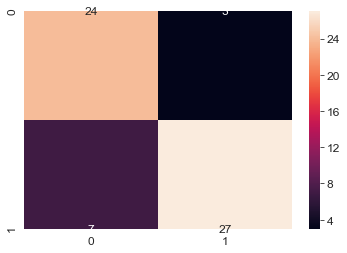

In [190]:
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")


As you can see , there is 2*2 matrix which shows positives and negatives. Total sample size is 302 and 14 features. out of 14 features , 13 are features and 1 is the predicted outcome(target). out of which 80% data is choosen as training data and 20% is choosen as testing data. 25 is predicted as true postive and 30 is predicted correctly as true negative. 2 is predicted wrongly true negative and 4 as false positive. 

Random Forest: Sensitivity and Specificity




Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive). Sensitivity is also termed as Recall. This implies that there will be another proportion of actual positive cases, which would get predicted incorrectly as negative (and, thus, could also be termed as the false negative). This can also be represented in the form of a false negative rate. The sum of sensitivity and false negative rate would be 1. Let's try and understand this with the model used for predicting whether a person is suffering from the disease. Sensitivity is a measure of the proportion of people suffering from the disease who got predicted correctly as the ones suffering from the disease. In other words, the person who is unhealthy actually got predicted as unhealthy.

Sensitivity = (True Positive)/(True Positive + False Negative)


Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative). This implies that there will be another proportion of actual negative, which got predicted as positive and could be termed as false positives. This proportion could also be called a false positive rate. The sum of specificity and false positive rate would always be 1. Let's try and understand this with the model used for predicting whether a person is suffering from the disease. Specificity is a measure of the proportion of people not suffering from the disease who got predicted correctly as the ones who are not suffering from the disease. In other words, the person who is healthy actually got predicted as healthy is specificity.

Specificity = (True Negative)/(True Negative + False Positive)



In [191]:
total=sum(sum(cm_2))

specificityRF = cm_2[0,0]/(cm_2[0,0]+cm_2[1,0])
print('Specificity : ', specificityRF)

sensitivityRF = cm_2[1,1]/(cm_2[1,1]+cm_2[0,1])
print('Sensitivity : ', sensitivityRF)


Specificity :  0.7741935483870968
Sensitivity :  0.9


As per the results above, specificity is showing 86% which is very good at predicting person who is healthy actually got predicted as healthy

Sensitivity is showing 93% which says its very good at predicting person who is unhealthy actually got predicted as unhealthy.

Random Forest: ROC and AUC


ROC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
    TPR = TP/TP+FN

False Positive Rate (FPR) is defined as follows:
    FPR = FP/FP+TN

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.



Area under the curve: 0.9749455337690631


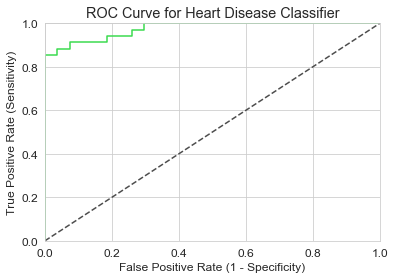

In [192]:
rf_probs = model.predict_proba(X_test)[:, 1]


from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
fprRF, tprRF, thresholds = metrics.roc_curve(y_test, rf_probs)

fig, ax = plt.subplots()
ax.plot(fprRF, tprRF)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

aucRF=metrics.auc(fprRF, tprRF)
print("Area under the curve:", aucRF)




Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent
0.80 - 0.90 = good
0.70 - 0.80 = fair
0.60 - 0.70 = poor
0.50 - 0.60 = fail

AUC for our model is 0.97 which is excellent according to the sources. 



# KNN classification algorithm

KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.

Since our problem is more of binary classification problem I am trying to use this algorithm to see how it works.



Step 1 : importing necessary libraries and split the dataset into training and testing data. I will be using the same training and testing data as used for other models

In [193]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))


2 NN Score: 62.30%


Step 2: I was using n_neighbors has 3 and score is very low. Lets try to find the best KNN score by changing the K neighbors value

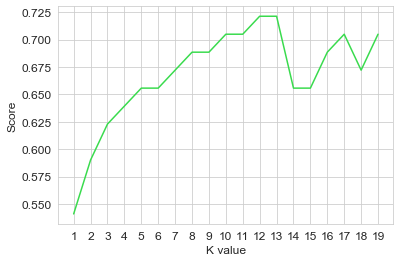

Maximum KNN Score is 72.13%


In [194]:
# try to find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
# adding KNN accuracy to that empty dictionary


accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))


Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

    Accuracy = number of correct predictions/Total number of predictions

Accuracy shows 72% for this model. Looks like logistic regression model has a good  score compared to this model with predicting heartdisease for the new patients. Lets check the other metrics for this model

Confusion Matrix (Heartdisease Dataset)
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 


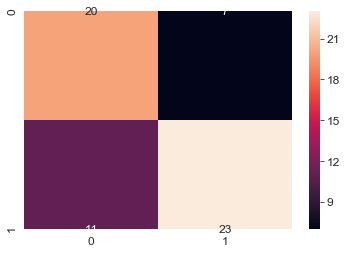

In [195]:
cm_KNN = confusion_matrix(y_test,knn2.predict(X_test))
sns.heatmap(cm_KNN,annot=True,fmt="d")


As you can see , there is 2*2 matrix which shows positives and negatives. Total sample size is 302 and 14 features. out of 14 features , 13 are features and 1 is the predicted outcome(target). out of which 80% data is choosen as training data and 20% is choosen as testing data. 20 is predicted as true postive and 23 is predicted correctly as true negative. 7 is predicted wrongly true negative and 11 as false positive. 

KNN: Sensitivity and Specificity




Sensitivity is a measure of the proportion of actual positive cases that got predicted as positive (or true positive). Sensitivity is also termed as Recall. This implies that there will be another proportion of actual positive cases, which would get predicted incorrectly as negative (and, thus, could also be termed as the false negative). This can also be represented in the form of a false negative rate. The sum of sensitivity and false negative rate would be 1. Let's try and understand this with the model used for predicting whether a person is suffering from the disease. Sensitivity is a measure of the proportion of people suffering from the disease who got predicted correctly as the ones suffering from the disease. In other words, the person who is unhealthy actually got predicted as unhealthy.

Sensitivity = (True Positive)/(True Positive + False Negative)


Specificity is defined as the proportion of actual negatives, which got predicted as the negative (or true negative). This implies that there will be another proportion of actual negative, which got predicted as positive and could be termed as false positives. This proportion could also be called a false positive rate. The sum of specificity and false positive rate would always be 1. Let's try and understand this with the model used for predicting whether a person is suffering from the disease. Specificity is a measure of the proportion of people not suffering from the disease who got predicted correctly as the ones who are not suffering from the disease. In other words, the person who is healthy actually got predicted as healthy is specificity.

Specificity = (True Negative)/(True Negative + False Positive)



In [196]:
total=sum(sum(cm_KNN))

specificityKNN = cm_KNN[0,0]/(cm_KNN[0,0]+cm_KNN[1,0])
print('Specificity : ', specificityKNN)

sensitivityKNN = cm_KNN[1,1]/(cm_KNN[1,1]+cm_KNN[0,1])
print('Sensitivity : ', sensitivityKNN)


Specificity :  0.6451612903225806
Sensitivity :  0.7666666666666667


As per the results above, specificity is showing 64% which is ok at predicting person who is healthy actually got predicted as healthy

Sensitivity is showing 76% which says its ok at predicting person who is unhealthy actually got predicted as unhealthy.

KNN: ROC and AUC


ROC curve
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate
True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:
    TPR = TP/TP+FN

False Positive Rate (FPR) is defined as follows:
    FPR = FP/FP+TN

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.



Area under the curve: 0.7483660130718954


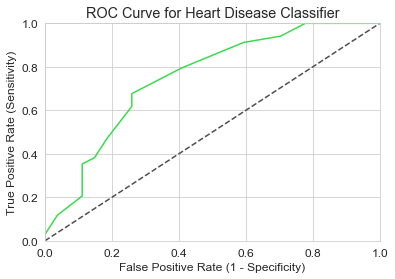

In [197]:
KNN_probs = knn2.predict_proba(X_test)[:, 1]


from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y_test, KNN_probs)
fprKNN, tprKNN, thresholds = metrics.roc_curve(y_test, KNN_probs)

fig, ax = plt.subplots()
ax.plot(fprKNN, tprKNN)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve for Heart Disease Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

aucKNN=metrics.auc(fprKNN, tprKNN)
print("Area under the curve:", aucKNN)




Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent
0.80 - 0.90 = good
0.70 - 0.80 = fair
0.60 - 0.70 = poor
0.50 - 0.60 = fail

AUC for our model is 0.74 which is fair according to the sources. 



Lets compare the model with their accuracy metric to see which one is the best fit

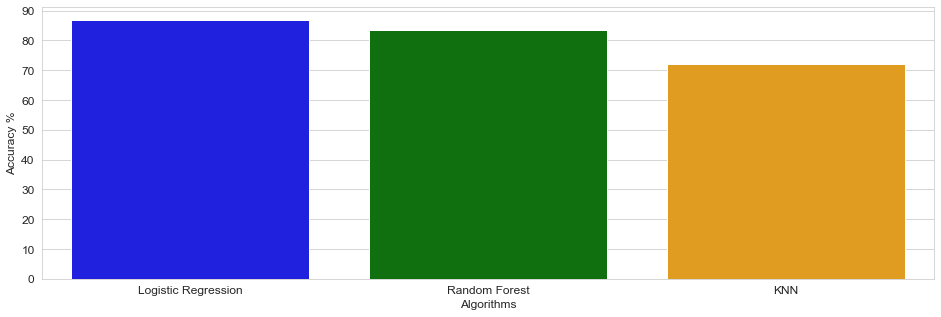

In [198]:
colors = ["blue", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()


Conclusion : Heartdisease dataset is a small dataset . Based on that looks like logistic model is the right fit for this classification problem out of the two models that I discussed above. Lets look at the metrics comparison of logistic regression and random forest , KNN as below

1. Accuracy of logistic model is 86% as compared to random forest its 83% and KNN its 72%
2. AUC of logistic model is 0.90 as compared to random forest its 0.95 and KNN is 0.75
3. Precision and recall of logistic model is 86% 
4. Specificity and sensitivity of logistic model are 88% and 86% whereas for random forest its 74% and 86% KNN its 68% and 76%